# Model Training

## Table of Contents
* [Chapter 3: Modelling](#chapter3)
    * [3.1 Evaluation Metrics](#section3_1)
    * [3.2 Machine Learning Models](#section3_2)
    * [3.3 Modelling Evaluations](#section3_3)
* [Chapter 4: Results](#chapter4)

## Chapter 3: Modelling <a class="anchor" id="chapter3"></a>

### 3.1 Evaluation Metrics  <a class="anchor" id="section3_1"></a>

Our primary task is to predict bankruptcy (a classification problem). Below are the key classification metrics that we will use to evaluate our model performance:

#### 3.1.1 Accuracy
Accuracy provides a ratio of correctly predicted observations to the total observations. It is especially useful when the classes are balanced with SMOTE.

**Formula**:
$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

#### 3.1.2 Confusion Matrix and Related Terms
The confusion matrix is a table layout that allows visualization of the performance of the algorithm, where each number in the matrix represents:
- **TP (True Positives)**: Correctly predicted positive observations.
- **TN (True Negatives)**: Correctly predicted negative observations.
- **FP (False Positives)**: Incorrectly predicted as positive.
- **FN (False Negatives)**: Incorrectly predicted as negative.

#### 3.1.3 Precision, Recall, and F1-Score
These metrics offer a deeper understanding of the model's performance by taking into account data imbalances, thereby providing a more nuanced view of the accuracy across different class labels.

- **Precision**:
$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$
Precision measures the accuracy of positive predictions.

- **Recall** (or Sensitivity or TPR):
$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$
Recall measures the ability of a model to find all the relevant cases (all positive samples).

- **F1-Score**:
$$ \text{F1-Score} = 2 \times \left( \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \right) $$
The F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. A high F1-score shows a model can classify the positive class correctly, while not misclassifying many negative classes as positive.

In bankruptcy prediction, avoiding false negatives is crucial due to their greater potential costs compared to false positives. Hence, we focus on the F1 score and recall in our model evaluation. The F1 score balances precision with recall, penalizing false negatives, while a high recall ensures most bankruptcy cases are correctly identified. These metrics are more indicative of our model's performance for this task than mere accuracy.

In [100]:
# import evaluation metrics
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)


# function to print all evaluation results
def get_acc(y_test, y_pred):
    return round(accuracy_score(y_test, y_pred), 3)


def get_pre(y_test, y_pred):
    return round(precision_score(y_test, y_pred), 3)


def get_rec(y_test, y_pred):
    return round(recall_score(y_test, y_pred), 3)


def get_f1(y_test, y_pred):
    return round(f1_score(y_test, y_pred), 3)


def print_res(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {get_acc(y_test, y_pred)}")
    print(f"Precision Score: {get_pre(y_test, y_pred)}")
    print(f"Recall Score: {get_rec(y_test, y_pred)}")
    print(f"F1 Score: {get_f1(y_test, y_pred)}")
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


def print_kfold_res(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = {"accuracy": [], "precision": [], "recall": [], "f1": []}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        scores["accuracy"].append(accuracy_score(y_test, y_pred))
        scores["precision"].append(precision_score(y_test, y_pred, average="binary"))
        scores["recall"].append(recall_score(y_test, y_pred, average="binary"))
        scores["f1"].append(f1_score(y_test, y_pred, average="binary"))

    mean_scores = {key: np.mean(value) for key, value in scores.items()}
    print("K-Fold Cross-Validation Results:")
    print(f"Mean Accuracy: {mean_scores['accuracy']:.3f}")
    print(f"Mean Precision: {mean_scores['precision']:.3f}")
    print(f"Mean Recall: {mean_scores['recall']:.3f}")
    print(f"Mean F1 Score: {mean_scores['f1']:.3f}")

### 3.2 Machine Learning Model Packages <a class="anchor" id="section3_2"></a>

#### 3.2.1 Scikit-learn (sklearn)
- **KNeighborsClassifier**: This model implements the k-nearest neighbors voting algorithm.
- **LogisticRegression**: A model that applies logistic regression for binary classification tasks.
- **SVC**: Support Vector Machine classifier known for its effectiveness in high-dimensional spaces.
- **DecisionTreeClassifier**: A model that uses a decision tree for classification, useful for interpretability.
- **GradientBoostingClassifier**: An ensemble model that builds on weak prediction models to create a strong classifier.
- **RandomForestClassifier**: A meta estimator that fits a number of decision tree classifiers to various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting.

#### 3.2.2 Imbalanced-learn (imblearn)
Dealing with imbalanced data:

- **BalancedRandomForestClassifier**: A variation of the RandomForest that handles imbalances by adjusting weights inversely proportional to class frequencies in the input data.

#### 3.2.3 XGBoost (xgboost)

- **XGBoost**: An implementation of gradient boosted decision trees designed for speed and performance.


In [101]:
# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# imblearn
from imblearn.ensemble import BalancedRandomForestClassifier

# XGBoost
import xgboost as xgb

### 3.3 Model Evaluations <a class="anchor" id="section3_3"></a>

In this section, we present the classification performance of all the Machine Learning Models that we used. We first evaluate the performance of a simple logistic regression to establish a benchmark for classification performance. Next, we explored other simple models, in the order of K-Nearest Neighbours, Support Vector Machine and Decision Tree. After that, we experimented with emsemble methods, including Random Forest and Balanced Random Forest. 

We will present a summary of the performance evaluations of all the models in the section 3.4. 


#### 3.3.1 Logistic regression
As the benchmark model, the logistic regression model provides an initial overview of how well simple models can predict outcomes based on our data.

In [102]:
X_train, X_test, y_train, y_test = pre_process(df)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[1621 1378]
 [  66   86]]
Accuracy: 0.542
Precision Score: 0.059
Recall Score: 0.566
F1 Score: 0.106
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.54      0.69      2999
           1       0.06      0.57      0.11       152

    accuracy                           0.54      3151
   macro avg       0.51      0.55      0.40      3151
weighted avg       0.92      0.54      0.66      3151



#### 3.3.2 K-Nearest Neighbors (KNN)
We continue our modeling with the K-Nearest Neighbors (KNN) algorithm to compare its performance against the baseline established by logistic regression. KNN is a technique that predicts the class of a given point based on the majority vote of its nearest neighbors. KNN is useful for gaining insights into the dataset’s structure due to its reliance on feature similarity. 

In [103]:
X_train, X_test, y_train, y_test = pre_process(df)


# KNN prediction wrapper
def KNN(X_training, X_testing, y_training, y_testing, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_training, y_training)
    y_pred = knn.predict(X_testing)
    print_res(y_testing, y_pred)


# our first choice of k is 5 by roundig up sqrt(number of features)
KNN(X_train, X_test, y_train, y_test, 5)

Confusion Matrix:
 [[2287  712]
 [ 106   46]]
Accuracy: 0.74
Precision Score: 0.061
Recall Score: 0.303
F1 Score: 0.101
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      2999
           1       0.06      0.30      0.10       152

    accuracy                           0.74      3151
   macro avg       0.51      0.53      0.47      3151
weighted avg       0.91      0.74      0.81      3151



Given the high dimensionality of our dataset, even after data cleaning, the KNN model might not perform optimally due to its known limitations with high-dimensional data. To address this issue, we apply Principal Component Analysis (PCA) to reduce the dimensionality. This step aims to enhance the performance of our KNN model by focusing on the most significant features and reducing the noise associated with less important variables.

In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix


def pca(X_train, X_test, y_train, y_test, n):
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])

    # Standardize the feature matrix
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize PCA with desired number of components
    pca = PCA(n_components=n)

    # Apply PCA to the standardized feature matrix
    X_pca = pca.fit_transform(X_scaled)
    columns = [f"PC{i+1}" for i in range(n)]  # Column names for components
    X_pca_df = pd.DataFrame(X_pca, columns=columns)
    X_train_pca = X_pca_df.iloc[:14014, :]
    X_test_pca = X_pca_df.iloc[14014:, :]
    return X_train_pca, X_test_pca

    # Now X_pca contains the reduced-dimensional dataset with n_components features


def KNN_pca(X_train, X_test, y_train, y_test, k, n):
    knn = KNeighborsClassifier(n_neighbors=k)

    X_train_pca, X_test_pca = pca(X_train, X_test, y_train, y_test, n)

    knn.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return pd.Series(
        {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}
    )


KNN_pca(X_train, X_test, y_train, y_test, 5, 3)


def find_optimal_n_pca(metric, a, b, k):  # k is k-neighbors
    max_n = 0
    max_met = 0
    for n in range(a, b):
        curr_met = KNN_pca(X_train, X_test, y_train, y_test, k, n)[metric]
        if curr_met > max_met:
            max_met = curr_met
            max_n = n
    return max_n, max_met


# list n that maximize model performance at each k
def list_pca():
    for metric in ["accuracy", "precision", "recall", "f1"]:
        print(metric)
        for k in range(1, 11):
            max_n, max_met = find_optimal_n_pca(metric, 1, 30, k)
            print(f"k={k} : {max_n}, {max_met}")
        print("\n")


list_pca()

accuracy
k=1 : 28, 0.8194224055855284


k=2 : 25, 0.8498889241510632
k=3 : 28, 0.78133925737861
k=4 : 28, 0.8102189781021898
k=5 : 29, 0.7575372897492859
k=6 : 28, 0.781021897810219
k=7 : 24, 0.7289749285940971
k=8 : 26, 0.7527768962234211
k=9 : 23, 0.7159631862900666
k=10 : 25, 0.7391304347826086


precision
k=1 : 25, 0.07615230460921844
k=2 : 25, 0.08951406649616368
k=3 : 28, 0.0888208269525268
k=4 : 28, 0.09601449275362318
k=5 : 27, 0.09042553191489362
k=6 : 28, 0.09730538922155689
k=7 : 28, 0.08362779740871613
k=8 : 26, 0.08804204993429698
k=9 : 26, 0.08463251670378619
k=10 : 26, 0.0893719806763285


recall
k=1 : 1, 0.5592105263157895
k=2 : 3, 0.26973684210526316
k=3 : 2, 0.4407894736842105
k=4 : 3, 0.34868421052631576
k=5 : 2, 0.47368421052631576
k=6 : 27, 0.4276315789473684
k=7 : 3, 0.5
k=8 : 11, 0.45394736842105265
k=9 : 3, 0.5526315789473685
k=10 : 17, 0.4868421052631579


f1
k=1 : 25, 0.11674347158218126
k=2 : 25, 0.1289134438305709
k=3 : 28, 0.1440993788819876
k=4 : 28, 0.1505681818181818
k=5 : 27, 0.15044247787610

We use list_pca to list out the best k and N to maximise different metrics. Based on the results ,we choose to use k=a and n(pca dimension) = 28 to get balance between precision, recall and f1 score. We also use k-fold cross validation to further improve our model.

In [105]:
from sklearn.model_selection import KFold

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])


def get_k_fold_model(X, y, k_neighbor, k):
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_neighbor)

    # Perform k-fold cross-validation
    kfold = KFold(n_splits=k, shuffle=True, random_state=130)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit KNN model
        knn.fit(X_train, y_train)

    return knn


X_train_pca28, X_test_pca28 = pca(X_train, X_test, y_train, y_test, 28)
X_pca = pd.concat([X_train_pca28, X_test_pca28])
kfold_model = get_k_fold_model(X_pca, y, 4, 10)

After making prediction using pca with 19 components, we reduce the data set to 3 dimension for visulisation 

In [106]:
# use all data in training and testing but remove outliers when doing visualization
import plotly.graph_objs as go


def plot_predict_pca_3d_remove_outlier(
    X_train, X_test, y_train, y_test, k, t, model=None
):

    if model is None:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)

    X_train_pca, X_test_pca = pca(X_train, X_test, y_train, y_test, 3)

    # Predict on the test set
    y_pred = model.predict(X_test)

    z_scores = np.abs((X_test_pca - X_test_pca.mean()) / X_test_pca.std())

    # Define a threshold for Z-score (e.g., 3)
    threshold = t

    # Find indices of outliers where Z-score is greater than the threshold
    outlier_indices = np.where(z_scores > threshold)

    remove_indices = list(set(outlier_indices[0]))
    remove_indices.sort()
    print((remove_indices))

    X_test_pca = X_test_pca.reset_index(drop=True)

    # Remove outliers from the PCA-transformed test data and corresponding labels
    X_test_pca_filtered = X_test_pca.drop(remove_indices)
    y_pred_filtered = np.delete(y_pred, remove_indices)

    print(f"original number of points {(X_test_pca.shape[0])}")
    print(f"current number of points {(X_test_pca_filtered.shape[0])}")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy = {accuracy}")
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    print(f"f1 = {f1}")
    print(f"confusion matrix = ")
    print(confusion_mat)
    print(classification_rep)

    trace = go.Scatter3d(
        x=X_test_pca_filtered.iloc[:, 0],
        y=X_test_pca_filtered.iloc[:, 1],
        z=X_test_pca_filtered.iloc[:, 2],
        mode="markers",
        marker=dict(color=y_pred_filtered, size=3),  # Use predictions as colors
    )

    # Create layout for the plot
    layout = go.Layout(
        title="PCA Visualization (3D) - Predictions",
        scene=dict(
            xaxis=dict(title="PC1"),
            yaxis=dict(title="PC2"),
            zaxis=dict(title="PC3"),
        ),
    )

    # Create figure and add trace
    fig = go.Figure(data=[trace], layout=layout)

    # Show the interactive plot
    fig.show()


plot_predict_pca_3d_remove_outlier(
    X_train_pca28, X_test_pca28, y_train, y_test, 4, 3, kfold_model
)

[120, 303, 372, 604, 673, 685, 719, 744, 849, 1129, 1131, 1328, 1331, 1415, 1453, 1577, 1643, 1679, 1784, 1992, 2017, 2063, 2109, 2203, 2285, 2608, 2813]
original number of points 3151
current number of points 3124
Accuracy = 0.8968581402729292
precision = 0.18772563176895307
recall = 0.34210526315789475
f1 = 0.24242424242424243
confusion matrix = 
[[2774  225]
 [ 100   52]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2999
           1       0.19      0.34      0.24       152

    accuracy                           0.90      3151
   macro avg       0.58      0.63      0.59      3151
weighted avg       0.93      0.90      0.91      3151



#### 3.3.3 Support Vector Machine (SVM)
We further our analysis by incorporating a Support Vector Machine (SVM) model to assess its effectiveness compared to the simpler models previously tested. SVM is a classification technique that finds the optimal hyperplane which best separates the data into different classes. It addresses the short comings of KNN, as it performs well in high-dimensional space and work well with non-linearly separable data.

In [107]:
from sklearn.model_selection import GridSearchCV


def SVM_return_model(*args, kernel_type_):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    # Training the SVM model
    svm_model = SVC(kernel=kernel_type_)
    print(f"\nkernel_type: {kernel_type_}")
    svm_model.fit(X_train, y_train)

    # Predictions on the testing set
    y_pred_train = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)

    # Evaluating the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print_res(y_test, y_pred_test)
    print(f"train_accuracy: {train_accuracy}")
    return svm_model


def SVM_sigmoid_model(*args):  # for ANOVA
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    model = SVM_return_model(*args, kernel_type_="sigmoid")
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluating the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return train_accuracy, test_accuracy

In [108]:
train_test_dataset = pre_process(df)
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
kernel_dict = dict()

for kernel_type in kernel_list:
    print(f"\033[96m{kernel_type}\033[00m")
    model = SVM_return_model(*train_test_dataset, kernel_type_=kernel_type)

# we found that sigmoid gives the best test accuracy
best_kernel_type = "sigmoid"

# use ANOVA test for feature selection
"""best_train_test_dataset = find_best_k_features_from_ANOVA(
    SVM_sigmoid_model, *train_test_dataset)"""  # commented out because it takes > 10 minutes to run

# we find that k=19 gives the best test accuracy
k_features = 19

linear

kernel_type: linear


Confusion Matrix:
 [[1639 1360]
 [  71   81]]
Accuracy: 0.546
Precision Score: 0.056
Recall Score: 0.533
F1 Score: 0.102
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.55      0.70      2999
           1       0.06      0.53      0.10       152

    accuracy                           0.55      3151
   macro avg       0.51      0.54      0.40      3151
weighted avg       0.91      0.55      0.67      3151

train_accuracy: 0.5247609533323819
poly

kernel_type: poly
Confusion Matrix:
 [[1319 1680]
 [  49  103]]
Accuracy: 0.451
Precision Score: 0.058
Recall Score: 0.678
F1 Score: 0.106
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.44      0.60      2999
           1       0.06      0.68      0.11       152

    accuracy                           0.45      3151
   macro avg       0.51      0.56      0.36      3151
weighted avg       0.92      0.45      0.58      315

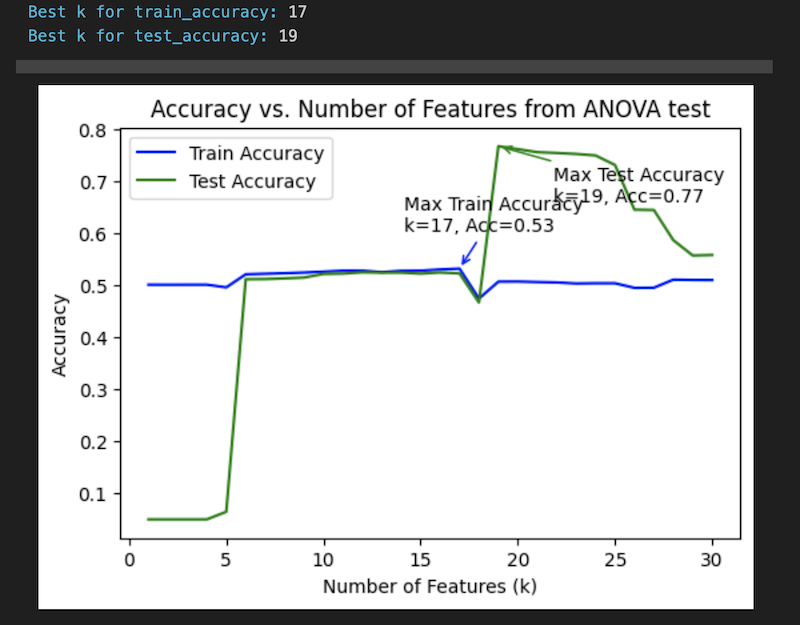

In [109]:
from IPython import display

display.Image("./SVM_find_best_k_ANOVA.png", width=400)

In [110]:
best_train_test_dataset = get_df_with_top_k_features(k_features, *train_test_dataset)

# Now we create a SVM model based on the top 19 features after ANOVA test, and sigmoid as kernel
SVM_model2 = SVM_return_model(*best_train_test_dataset, kernel_type_=best_kernel_type)

X_train1, X_test1, y_train1, y_test1 = best_train_test_dataset
conf_matrix = confusion_matrix(y_test1, y_test1)


kernel_type: sigmoid
Confusion Matrix:
 [[2375  624]
 [ 111   41]]
Accuracy: 0.767
Precision Score: 0.062
Recall Score: 0.27
F1 Score: 0.1
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87      2999
           1       0.06      0.27      0.10       152

    accuracy                           0.77      3151
   macro avg       0.51      0.53      0.48      3151
weighted avg       0.91      0.77      0.83      3151

train_accuracy: 0.505994005994006


The Support Vector Machine (SVM) model has not performed as expected in our analysis for several reasons:

1. **Sensitivity to Outliers**: SVM is particularly sensitive to outliers. In our dataset, we retained outliers to capture distinctive characteristics of different companies with respect to their bankruptcy status. This sensitivity can lead to skewed decision boundaries, adversely affecting model performance. 

2. **Overfitting Issues**: In this analysis, the SVM model has shown a tendency to overfit. This issue stems from the lack of an appropriate regularization function. Without proper regularization, SVM models can overly conform to the noise in the training data rather than capturing the general pattern, leading to poor generalization on new, unseen data.

Hence, this prompt us to improve our SVM model with grid search method.

In [111]:
# defining parameter range
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
}

# grid = GridSearchCV(SVM_model2, param_grid, refit=True, verbose=3)
# commented out because it takes >40 minutes to run

# fitting the model for grid search
# grid.fit(X_train1, y_train1)

From grid-search above, we found that the best hyperparameters are:
C=1, gamma=0.1, kernel=poly
Where the average accuracy score after cross-validation is 0.5122

In [112]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Create the SVC model with specified parameters
svm_model_after_gridsearch = SVC(C=1, gamma=0.1, kernel="poly")
svm_model_after_gridsearch.fit(X_train1, y_train1)

# Predictions on the testing set
y_pred_train = svm_model_after_gridsearch.predict(X_train1)
y_pred_test = svm_model_after_gridsearch.predict(X_test1)

# Evaluating the model
train_accuracy = accuracy_score(y_train1, y_pred_train)

print("\nSVM model with grid-search")
print_res(y_test1, y_pred_test)
print(f"train_accuracy: {train_accuracy}")


SVM model with grid-search
Confusion Matrix:
 [[ 251 2748]
 [   8  144]]
Accuracy: 0.125
Precision Score: 0.05
Recall Score: 0.947
F1 Score: 0.095
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.08      0.15      2999
           1       0.05      0.95      0.09       152

    accuracy                           0.13      3151
   macro avg       0.51      0.52      0.12      3151
weighted avg       0.92      0.13      0.15      3151

train_accuracy: 0.5239046667618096


#### 3.3.4 Decision Tree
A Decision Tree  works by splitting the dataset into smaller subsets based on feature values, thereby creating a tree structure. Each split is strategically made to maximize information gain—the reduction in entropy or disorder after the split. 

In [113]:
X_train, X_test, y_train, y_test = pre_process(df)  # with drop_high_core with smote

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2633  366]
 [ 101   51]]
Accuracy: 0.852
Precision Score: 0.122
Recall Score: 0.336
F1 Score: 0.179
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2999
           1       0.12      0.34      0.18       152

    accuracy                           0.85      3151
   macro avg       0.54      0.61      0.55      3151
weighted avg       0.92      0.85      0.88      3151



With grid search, we found the Best parameters: `{'max_depth': 40, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}`.
We further explore the model performance:

In [114]:
dt = DecisionTreeClassifier(
    max_depth=40, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2629  370]
 [  97   55]]
Accuracy: 0.852
Precision Score: 0.129
Recall Score: 0.362
F1 Score: 0.191
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2999
           1       0.13      0.36      0.19       152

    accuracy                           0.85      3151
   macro avg       0.55      0.62      0.55      3151
weighted avg       0.92      0.85      0.88      3151



#### 3.3.5 Random Forest
Random forest method is introduced as an improvement over single decision trees to reduce overfitting and improve predictive performance. Two underlying principles of random forest are:
1. **Bagging**: It creates multiple subsets of the training data through random sampling with replacement and using these subsets to train a collection of decision trees (weak learners). This method aims to reduce variance of prediction result.
2. **Random Subspace**: The random forest randomly selects a subset of features  from the original feature set for each individual decision tree within the ensemble. By allowing each tree to focus on a different subset of features, the random forest can capture different patterns and relationships within the data, leading to more accurate and stable predictions.

In [115]:
# random forest initial trial
X_train, X_test, y_train, y_test = pre_process(df)  # with drop_high_core with smote

rdt = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rdt.fit(X_train, y_train)
y_pred = rdt.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2062  937]
 [  52  100]]
Accuracy: 0.686
Precision Score: 0.096
Recall Score: 0.658
F1 Score: 0.168
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      2999
           1       0.10      0.66      0.17       152

    accuracy                           0.69      3151
   macro avg       0.54      0.67      0.49      3151
weighted avg       0.93      0.69      0.78      3151



In [116]:
# random forest with grid search best model
rdt = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=25,
    class_weight={0: 0.7, 1: 0.32},
    bootstrap=True,
    min_impurity_decrease=0.00001,
    random_state=42,
)

rdt.fit(X_train, y_train)
y_pred = rdt.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2877  122]
 [ 122   30]]
Accuracy: 0.923
Precision Score: 0.197
Recall Score: 0.197
F1 Score: 0.197
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2999
           1       0.20      0.20      0.20       152

    accuracy                           0.92      3151
   macro avg       0.58      0.58      0.58      3151
weighted avg       0.92      0.92      0.92      3151



During the model fitting process, we found out that the model could overfit on the training data, hence we proceed to reduce the dimension of our data with feature selection using forward selection loop.

In [117]:
X, y = process0(df)  # get all features, without SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3244
)

rdt_selected = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=25,
    class_weight={0: 0.7, 1: 0.32},
    bootstrap=True,
    min_impurity_decrease=0.00001,
    random_state=42,
)


# selected features from forward_feature_selection function
# takes very long to run, not included in report
# please refer to random forest jupyter notebook
selected_features = [
    "Attr42",
    "Attr58",
    "Attr27",
    "Attr9",
    "Attr19",
    "Attr31",
    "Attr36",
    "Attr56",
    "Attr23",
]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


rdt_selected.fit(X_train_selected, y_train)
y_pred_selected = rdt_selected.predict(X_test_selected)

print_res(y_test, y_pred_selected)

Confusion Matrix:
 [[2999    0]
 [ 149    3]]
Accuracy: 0.953
Precision Score: 1.0
Recall Score: 0.02
F1 Score: 0.039
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      2999
           1       1.00      0.02      0.04       152

    accuracy                           0.95      3151
   macro avg       0.98      0.51      0.51      3151
weighted avg       0.95      0.95      0.93      3151



#### 3.3.6 Balanced Random Forest (BRF)
The Balanced Random Forest (BRF) method enhances the traditional Random Forest by specifically addressing class imbalance in training datasets. This approach boosts predictive accuracy and fairness for unbalanced data. BRF tackles Random Forest’s limitations by ensuring equal class representation in each bootstrap sample, achieved through either downsampling or oversampling. Hence, SMOTE method is not utilised in the BRF model as it does not improve the performance. The following code demonstrates the BRF implementation on an imbalanced insurance dataset.

In [118]:
# balanced random forest initial trial
X, y = process0(df)  # get all features, without SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3244
)

brf = BalancedRandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2069  930]
 [  44  108]]
Accuracy: 0.691
Precision Score: 0.104
Recall Score: 0.711
F1 Score: 0.182
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      2999
           1       0.10      0.71      0.18       152

    accuracy                           0.69      3151
   macro avg       0.54      0.70      0.50      3151
weighted avg       0.94      0.69      0.78      3151



In [119]:
# balanced random forest with grid search best model
brt = BalancedRandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=25,
    class_weight={0: 0.7, 1: 0.32},  # this is manually adjusted
    bootstrap=True,
    min_impurity_decrease=0.00001,
    random_state=42,
)

brt.fit(X_train, y_train)
y_pred = brt.predict(X_test)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2229  770]
 [  52  100]]
Accuracy: 0.739
Precision Score: 0.115
Recall Score: 0.658
F1 Score: 0.196
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      2999
           1       0.11      0.66      0.20       152

    accuracy                           0.74      3151
   macro avg       0.55      0.70      0.52      3151
weighted avg       0.94      0.74      0.81      3151



Same as random forest, one downside of hyperparameter tuning with grid search is that it could potentially lead to overfitting of the training data. We also try to reduce this via forward feature selection.

In [120]:
brf_selected = BalancedRandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=10,
    max_depth=25,
    class_weight={0: 0.7, 1: 0.32},  # manually adjusted classweights
    bootstrap=True,
    min_impurity_decrease=0.00001,
    random_state=42,
)


# selected features from filter method (takes very long to run, not included in report)
# please refer to balancedRF jupyter notebook
selected_features = [
    "Attr24",
    "Attr14",
    "Attr27",
    "Attr22",
    "Attr13",
    "Attr34",
    "Attr21",
    "Attr39",
    "Attr41",
]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


brf_selected.fit(X_train_selected, y_train)
y_pred = brf_selected.predict(X_test_selected)

print_res(y_test, y_pred)

Confusion Matrix:
 [[2516  483]
 [  53   99]]
Accuracy: 0.83
Precision Score: 0.17
Recall Score: 0.651
F1 Score: 0.27
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      2999
           1       0.17      0.65      0.27       152

    accuracy                           0.83      3151
   macro avg       0.57      0.75      0.59      3151
weighted avg       0.94      0.83      0.87      3151



#### 3.3.7. XGboost (eXtreme Gradient Boosting)

XGBoost is based on the gradient boosting framework and utilizes decision trees as base learners. It iteratively improves predictions by minimizing a loss function, employing techniques like regularization to prevent overfitting.

Without SMOTE

In [121]:
X_train, X_test, y_train, y_test = process2(df)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    objective="binary:logistic",
    tree_method="hist",
    eta=0.1,
    max_depth=3,
    enable_categorical=True,
)

xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
print_res(y_test, y_pred)

Confusion Matrix:
 [[2997    2]
 [ 125   27]]
Accuracy: 0.96
Precision Score: 0.931
Recall Score: 0.178
F1 Score: 0.298
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2999
           1       0.93      0.18      0.30       152

    accuracy                           0.96      3151
   macro avg       0.95      0.59      0.64      3151
weighted avg       0.96      0.96      0.95      3151



With SMOTE

In [122]:
X_train, X_test, y_train, y_test = pre_process(df)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    objective="binary:logistic",
    tree_method="hist",
    eta=0.1,
    max_depth=3,
    enable_categorical=True,
)

xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
print_res(y_test, y_pred)

Confusion Matrix:
 [[2554  445]
 [  66   86]]
Accuracy: 0.838
Precision Score: 0.162
Recall Score: 0.566
F1 Score: 0.252
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2999
           1       0.16      0.57      0.25       152

    accuracy                           0.84      3151
   macro avg       0.57      0.71      0.58      3151
weighted avg       0.94      0.84      0.88      3151



#### 3.3.8 Deep learning 

Here, we explore the use of neural network for binary classification. Neural networks are a deep learning method consisting of hidden layers. Neural networks can be trained to discern between the two classes by processing input data through multiple hidden layers, each performing a series of transformations on the data. 

In [123]:
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = pre_process(df)
print(X_train.shape)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

print(encoder.classes_)

(14014, 30)
[0 1]


In [ ]:
import torch

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

Here, we consider a wide and deep neural network.  
- Wide -> Only one layer
- Deep -> Several layers

In [ ]:
import torch.nn as nn

feature_num = 30


class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(feature_num, 60)
        self.relu = nn.ReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x


class Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(feature_num, 60)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(60, 60)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(60, 60)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [ ]:
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm


def train_nn(model, X_train, y_train, X_val, y_val):
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    n_epochs = 250
    batch_size = 1000
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_acc = -np.inf  # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:

                X_batch = X_train[start : start + batch_size]
                y_batch = y_train[start : start + batch_size]

                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)

                optimizer.zero_grad()
                loss.backward()

                optimizer.step()

                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(loss=float(loss), acc=float(acc))

        # evaluate accuracy
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())

    # get model with best accuracy
    model.load_state_dict(best_weights)
    return best_acc

In [ ]:
wide_model = Wide()
acc = train_nn(wide_model, X_train, y_train, X_test, y_test)
print("Accuracy (wide): %.2f" % acc)

deep_model = Deep()
acc = train_nn(deep_model, X_train, y_train, X_test, y_test)
print("Accuracy (deep): %.2f" % acc)

The model accuracy across different runs is very variable. However, on average, the accuracy is around 0.05, which is very low. This is because neural networks do not generally do well on tabular data. 

## Chapter 4: Numerical results

After experimenting with different models and different feature selection and fine-tuning methods, we have summarise the model metrics below.

|No | Model| Feature Selection | With SMOTE | Model Improvement methods| Test Accuracy	| Precision |	Recall | F1-score |
|:---------:|:--------:|:---------:|:---------:|:--------:|:---------:|:---------:|:--------:|:---------:|
| 1 | Logistic         | ANOVA (k=15)      | yes        |                           | 0.57     | 0.05      | 0.53   | 0.09 |
| 2 | KNN              | PCA               | yes        | K-fold cross validation   | 0.909    | 0.188     | 0.342  | 0.242|
| 3 | KNN              |                   | yes        | Bagging                   |0.966    | 1         | 0.194  | 0.325|
| 4 | Random Forest    | selection loop    | yes        | Grid-search               |  0.906    | 0.23      | 0.5    | 0.31 |
| 5 | SVM              | ANOVA (k=25)      | yes        | kernel= sigmoid           |0.601    | 0.04      | 0.38   | 0.07 |
| 6 | SVM              | ANOVA (k=25)      | yes        | Grid-search               |  0.54     | 0.07      | 0.77   | 0.13 |
| 7 | Decision Tree    | get_train_test    | no         |                           | 0.919          | 0.185    | 0.197     | 0.191  |      |
| 8 | Decision Tree    |                   | yes        |                           | 0.865          | 0.138    | 0.342     | 0.197  |      |
| 9 | Decision Tree    |                   | no         | Grid-search               | 0.933          | 0.237    | 0.178     | 0.203  |      |
|10 | Decision Tree    |                   | yes        | Grid-search               | 0.861          | 0.137    | 0.355     | 0.198  |      |
|11 | XGBoost          |                   | no         |                           | 0.96           | 0.931    | 0.178     | 0.298  |      |
|12 | XGBoost          |                   | yes        |                           | 0.838          | 0.162    | 0.566     | 0.252  |      |
|13 | Balanced RF      | selection loop    | no         | grid_search, classweight  | 0.83          | 0.17    | 0.65     | 0.33   | 
|14 | Neural Network (Wide)|   | yes        |   | 0.05          |  - |   -   |   - | 
|15 | Neural Network (Deep)|     | yes         |  | 0.06          |-     |    -   |  - | 

Overall, we see that the top 3 models are:
1. Random Forest (Model No.3)
2. Balanced RF   (Model No.13)
3. XGBoost       (Model No.11)

Among precision and recall, we prioritise getting higher recall score, meaning, we want to avoid getting FN, which occurs when companies that are going to be bankrupt are predicted as not-bankrupt. In other words, when failing companies are wrongly predicted as successful. Because, companies predicted as not bankrupt might perform actions that put their financial situation at further risks. Thus, failure to detect bankruptcy is very risky. 
Note: High recall = TP / (TP + FN)